<a href="https://colab.research.google.com/github/roshinip21/California_HousePrice_Prediction/blob/main/California_Real_Estate_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BDA/RealEstate_California.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [6]:
pip install plotly

#  **Descriptive Analysis**

In [7]:
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [8]:
print(df.dtypes)

Unnamed: 0              int64
id                     object
stateId                 int64
countyId                int64
cityId                  int64
country                object
datePostedString       object
is_bankOwned            int64
is_forAuction           int64
event                  object
time                  float64
price                 float64
pricePerSquareFoot    float64
city                   object
state                  object
yearBuilt               int64
streetAddress          object
zipcode               float64
longitude             float64
latitude              float64
hasBadGeocode           int64
description            object
currency               object
livingArea            float64
livingAreaValue       float64
lotAreaUnits           object
bathrooms             float64
bedrooms              float64
buildingArea          float64
parking                 int64
garageSpaces          float64
hasGarage               int64
levels                 object
pool      

In [9]:
print(df.shape)
print(df.size)

(35389, 39)
1380171


In [10]:
df.describe()

,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,...,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,35389.000000,35389.0,35389.000000,35389.000000,35389.000000,35389.000000,3.510000e+04,3.538900e+04,3.538900e+04,35389.000000,...,35389.000000,35389.000000,3.538900e+04,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000
mean,17694.000000,9.0,132098.297776,34078.596852,0.000085,0.000735,1.614512e+12,1.187889e+06,8.459892e+02,1637.428664,...,2.038684,2.646557,7.081804e+02,0.652830,1.020345,0.492582,0.114584,0.166436,0.013705,0.017915
std,10216.068675,0.0,95436.014804,54411.451830,0.009207,0.027096,6.899196e+10,2.564884e+06,2.211111e+04,746.333162,...,1.687610,2.018320,4.833029e+04,0.476077,1.470744,0.499952,0.318523,0.372477,0.116264,0.132645
min,0.000000,9.0,77.000000,0.000000,0.000000,0.000000,8.717760e+10,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8847.000000,9.0,51737.000000,12773.000000,0.000000,0.000000,1.624320e+12,3.999000e+05,1.810000e+02,1929.000000,...,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17694.000000,9.0,111366.000000,25855.000000,0.000000,0.000000,1.625270e+12,6.990000e+05,3.710000e+02,1964.000000,...,2.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26541.000000,9.0,213392.000000,44661.000000,0.000000,0.000000,1.625789e+12,1.199888e+06,5.890000e+02,1989.000000,...,3.000000,4.000000,0.000000e+00,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,35388.000000,9.0,333080.000000,781837.000000,1.000000,1.000000,1.626221e+12,9.500000e+07,2.100000e+06,9999.000000,...,58.000000,99.000000,9.061351e+06,1.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000


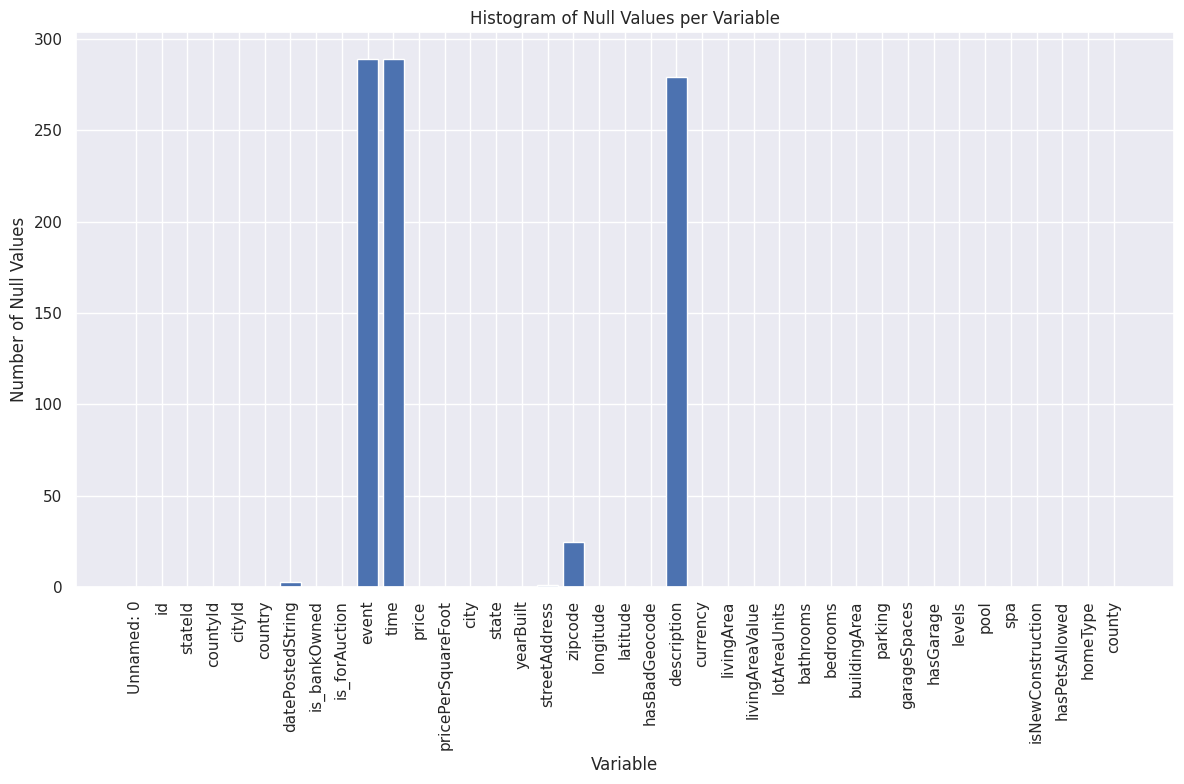

In [11]:
nulls_per_variable = df.isnull().sum()
plt.figure(figsize=(12, 8))
plt.bar(nulls_per_variable.index, nulls_per_variable)
plt.title('Histogram of Null Values per Variable')
plt.xlabel('Variable')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns].corr()['price'].sort_values(ascending=False)

,price
price,1.000000
bathrooms,0.349730
bedrooms,0.177538
pool,0.149845
garageSpaces,0.109260
spa,0.105297
yearBuilt,0.043374
hasGarage,0.038614
time,0.038603
isNewConstruction,0.036400


In [13]:
# We count each of the cities and select the 10 with the most occurrences.
top_cities = df['city'].value_counts().nlargest(10).index
df_top_cities = df[df['city'].isin(top_cities)]

# We plot the chart.
fig = px.histogram(df_top_cities, x='city', nbins=25, color='city', template='plotly')
fig.update_layout(title='Number of homes per city')
fig.show()

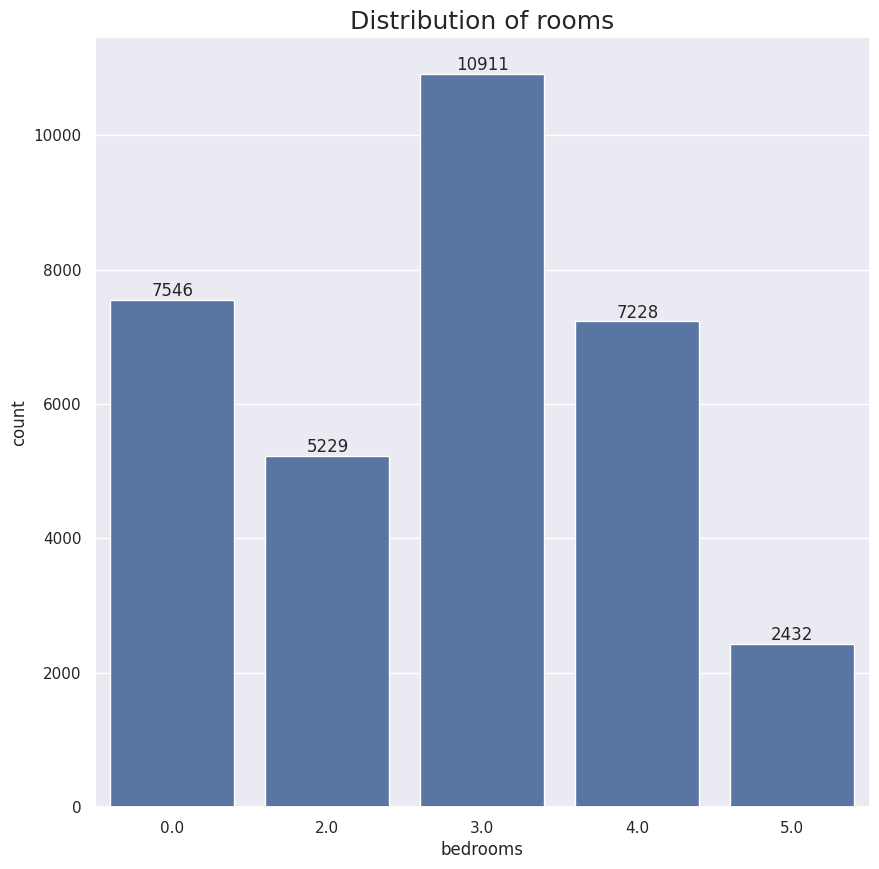

In [14]:
# We count each of the cities and select the 10 with the most occurrences.
top_bed_values = df['bedrooms'].value_counts().head(5).index
df_filtered = df[df['bedrooms'].isin(top_bed_values)]

# We draw the graph.
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_filtered, x='bedrooms')

# A label is added to each column with the count.
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title('Distribution of rooms', fontsize=18)
plt.show()

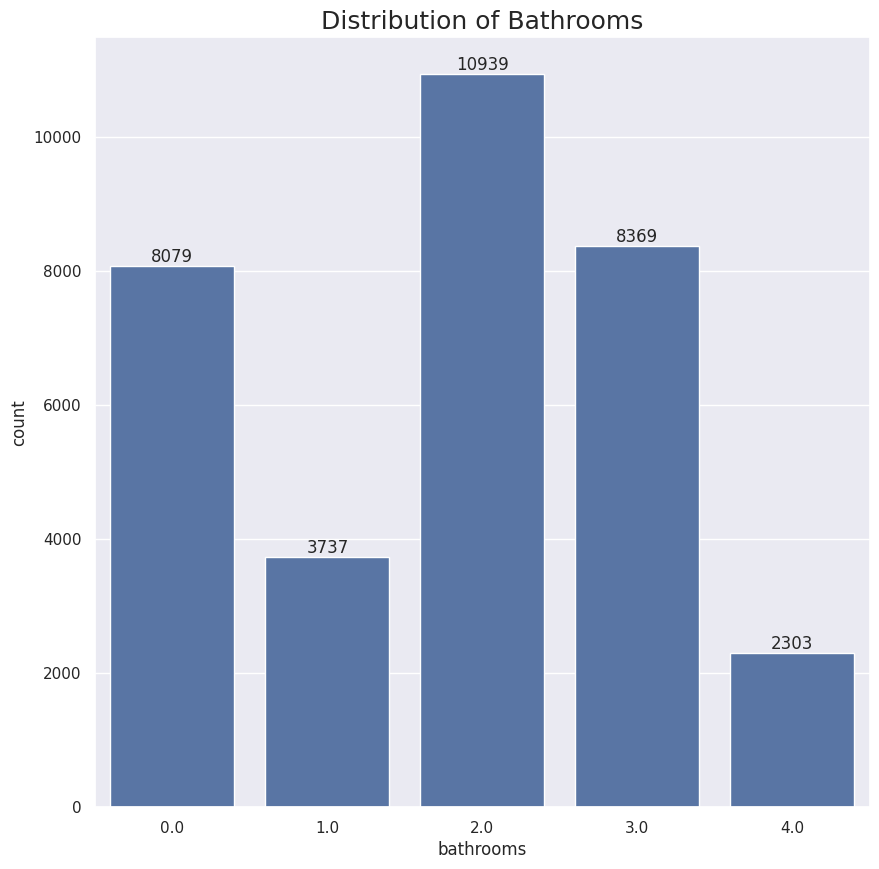

In [15]:
# We count the number of bathrooms and select the 5 most common values.
top_bath_values = df['bathrooms'].value_counts().head(5).index
df_filtered2 = df[df['bathrooms'].isin(top_bath_values)]

# We plot the chart.
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_filtered2, x='bathrooms')

# A label is added to each column with the count.
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title('Distribution of Bathrooms', fontsize=18)
plt.show()

In [16]:
# We group by city and sum the number of rooms, then select the 10 with the highest total.
top10 = df.groupby('city')['bedrooms'].sum().nlargest(10).reset_index()

# We plot the chart.
fig = px.bar(top10, x='city', y='bedrooms',color='bedrooms', template='plotly',
             title='Cities with the most rooms')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [17]:
# We group by city and sum the number of rooms, then select the 10 with the highest total.
top10 = df.groupby('city')['bathrooms'].sum().nlargest(10).reset_index()

# We plot the chart
fig = px.bar(top10, x='city', y='bathrooms',color='bathrooms', template='plotly',
             title='Cities with the most bathrooms')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [18]:
# We group by city and calculate the averages of rooms and bathrooms.
df_mean = df.groupby('city')[['bedrooms', 'bathrooms']].mean().reset_index()

# The results are sorted in descending order.
df_mean_sort = df_mean.sort_values(by=['bedrooms', 'bathrooms'], ascending=False)

# The 10 cities with the highest averages are selected.
top10 = df_mean_sort.head(10)

# We plot the chart.
fig = px.bar(top10, x='city', y=['bedrooms', 'bathrooms'], barmode='group',
             color_discrete_sequence=['blue', 'orange'],
             labels={'value': 'Media'},
             title='The top 10 cities with the highest averages')
fig.show()

In [19]:
# We group by city and calculate the average price per square foot.
df_mean = df.groupby('city')['pricePerSquareFoot'].mean().reset_index()

# We sort in descending order.
df_mean_sort = df_mean.sort_values(by='pricePerSquareFoot', ascending=False)

# We select the 10 with the highest average.
top10 = df_mean_sort.head(10)

# We plot the chart.
fig = px.bar(top10, x='city', y='pricePerSquareFoot', color='pricePerSquareFoot', template='plotly',
             title='The 10 cities with the highest average price per square foot.')
fig.update_layout(xaxis_title='City', yaxis_title='Mean pricePerSquareFoot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [20]:
# We plot the chart.
fig = px.histogram(df, x="price", nbins=100, template="plotly")
fig.update_layout(title="Distribution of housing prices")

# We instruct it to plot the homes up to 10M.
fig.update_xaxes(range=[0, 10000000])
fig.show()

In [21]:
#  We plot the chart.
fig = px.histogram(df, x="price", color="bedrooms", nbins=200)
fig.update_layout(title="Price distribution based on the number of rooms", xaxis_title="Price", yaxis_title="Number of rooms")
#  We instruct it to plot the homes up to 2M.
fig.update_xaxes(range=[0, 2000000])
fig.show()

In [22]:
#  We plot the chart.
fig = px.histogram(df, x="price", color="bathrooms", nbins=200)
fig.update_layout(title="Price distribution based on the number of bathrooms", xaxis_title="Price", yaxis_title="Number of bathrooms")

#  We instruct it to plot the homes up to 2M.
fig.update_xaxes(range=[0, 2000000])
fig.show()

# Transformations of the dataset

In [23]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.set_index('id', inplace=True)
df

,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
id,,,,,,,,,,,,,,,,,,,,,
95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90036-20610069,9,130313,12447,USA,2021-06-19,0,0,Listing removed,1.620259e+12,3360000.0,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
90036-20610391,9,130314,12447,USA,2021-06-17,0,0,Listing removed,1.624320e+12,1699000.0,...,1,2.0,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
95062-16111852,9,130368,13715,USA,2021-06-21,0,0,Listed for sale,1.624234e+12,1450000.0,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [24]:
df = df.drop(df[(df['bathrooms'] == 0) | (df['bedrooms'] == 0) | (df['pricePerSquareFoot'] == 0) | (df['price'] == 0) | (df['livingAreaValue'] == 0)].index)

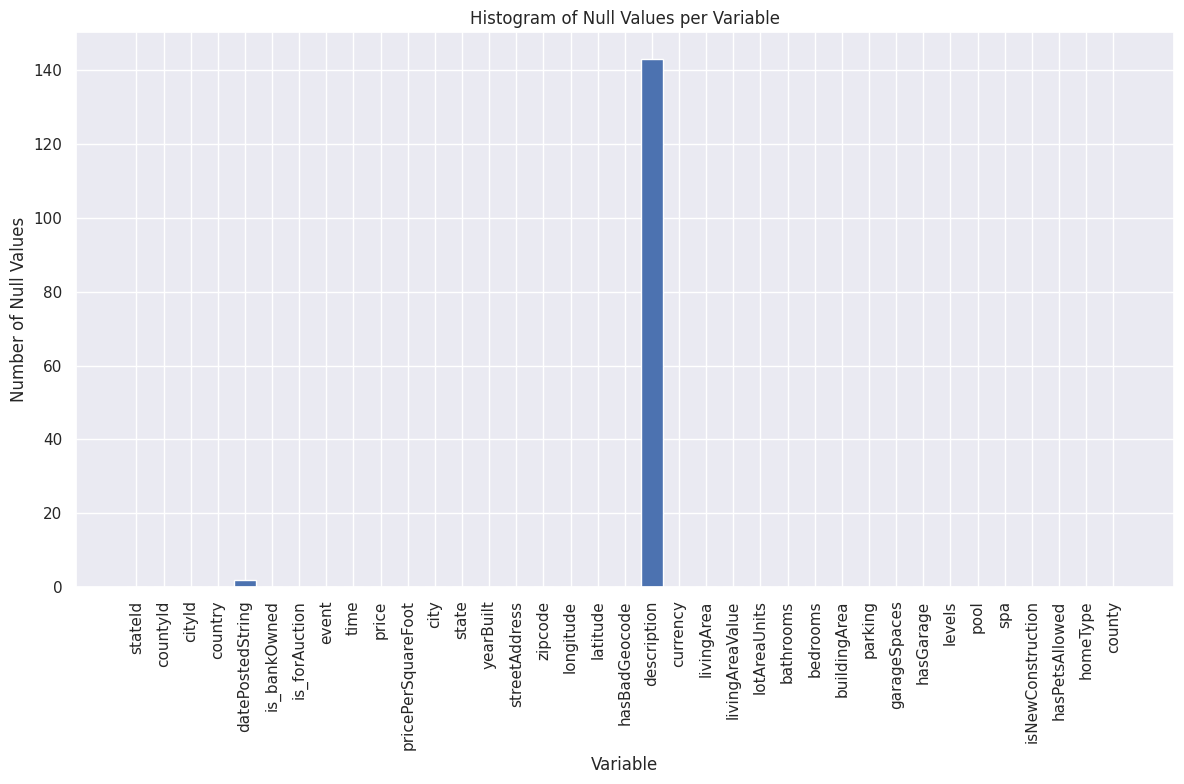

In [26]:
nulls_per_variable = df.isnull().sum()
plt.figure(figsize=(12, 8))
plt.bar(nulls_per_variable.index, nulls_per_variable)
plt.title('Histogram of Null Values per Variable')
plt.xlabel('Variable')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
df_new = df.filter(['price', 'homeType','county','parking','levels','city','bathrooms','bedrooms','pool','garageSpaces','spa','hasGarage ','isNewConstruction','countyId','cityId','livingAreaValue','is_forAuction','pricePerSquareFoot'])
df_new.head()

,price,homeType,county,parking,levels,city,bathrooms,bedrooms,pool,garageSpaces,spa,isNewConstruction,countyId,cityId,livingAreaValue,is_forAuction,pricePerSquareFoot
id,,,,,,,,,,,,,,,,,
94564-18496265,675000.0,SINGLE_FAMILY,Contra Costa County,1,One Story,Pinole,2.0,3.0,0,2.0,0,0,189,36958,1671.0,0,404.0
94564-18484475,649000.0,SINGLE_FAMILY,Contra Costa County,1,One Story,Pinole,2.0,3.0,0,2.0,0,0,190,36958,1414.0,0,459.0
94564-18494835,599000.0,SINGLE_FAMILY,Contra Costa County,1,Two Story,Pinole,2.0,3.0,0,1.0,1,0,191,36958,1336.0,0,448.0
94564-18484390,575000.0,SINGLE_FAMILY,Contra Costa County,1,One Story,Pinole,2.0,3.0,0,2.0,0,0,193,36958,1413.0,0,407.0
94564-50919342,888000.0,SINGLE_FAMILY,Contra Costa County,1,Two Story,Pinole,3.0,5.0,0,2.0,0,0,194,36958,2278.0,0,390.0


In [28]:
df_new.isnull().sum()

,0
price,0
homeType,0
county,0
parking,0
levels,0
city,0
bathrooms,0
bedrooms,0
pool,0
garageSpaces,0


<Axes: xlabel='price', ylabel='Density'>

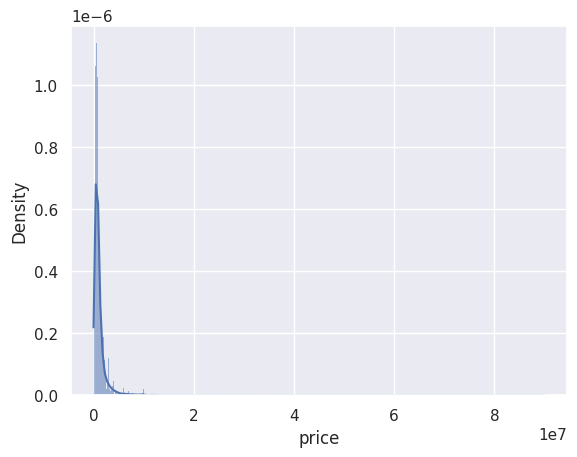

In [29]:
sns.histplot(df_new['price'],kde=True, stat="density", linewidth=0)

<Axes: xlabel='price', ylabel='Density'>

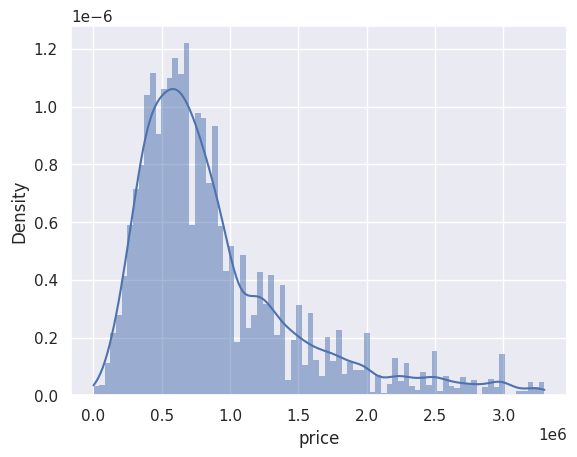

In [30]:
# Let's declare a variable that will be equal to the 95th percentile of the 'price' variable.
q = df_new['price'].quantile(0.95)

# Then we can create a new dataframe, with the condition that all prices must be below the 95th percentile.
data = df_new[df_new['price']<q]

# We plot the new distribution.
sns.histplot(data['price'],kde=True, stat="density", linewidth=0)

In [31]:
print(data.shape)
print(data.size)

(25168, 17)
427856


In [32]:
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns].corr()['price'].sort_values(ascending=False)

,price
price,1.000000
livingAreaValue,0.497833
bathrooms,0.497147
bedrooms,0.336971
garageSpaces,0.137470
pool,0.131793
spa,0.089348
isNewConstruction,0.051234
pricePerSquareFoot,0.020976
countyId,0.019211


In [33]:
data_clean = data.filter(['price','livingAreaValue','bathrooms','bedrooms','county','spa','homeType','pool','levels','city','pricePerSquareFoot','garageSpaces'])

In [34]:
# We create the variable for the logarithm of the price.
log_price = np.log(data_clean['price'])
# We add it to our dataframe.
data_clean['log_price'] = log_price
data_clean.head()

,price,livingAreaValue,bathrooms,bedrooms,county,spa,homeType,pool,levels,city,pricePerSquareFoot,garageSpaces,log_price
id,,,,,,,,,,,,,
94564-18496265,675000.0,1671.0,2.0,3.0,Contra Costa County,0,SINGLE_FAMILY,0,One Story,Pinole,404.0,2.0,13.422468
94564-18484475,649000.0,1414.0,2.0,3.0,Contra Costa County,0,SINGLE_FAMILY,0,One Story,Pinole,459.0,2.0,13.383188
94564-18494835,599000.0,1336.0,2.0,3.0,Contra Costa County,1,SINGLE_FAMILY,0,Two Story,Pinole,448.0,1.0,13.303017
94564-18484390,575000.0,1413.0,2.0,3.0,Contra Costa County,0,SINGLE_FAMILY,0,One Story,Pinole,407.0,2.0,13.262125
94564-50919342,888000.0,2278.0,3.0,5.0,Contra Costa County,0,SINGLE_FAMILY,0,Two Story,Pinole,390.0,2.0,13.696727


<Axes: xlabel='log_price', ylabel='Density'>

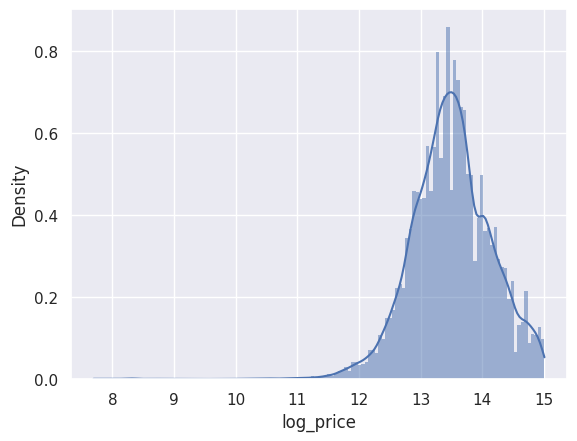

In [35]:
sns.histplot(data_clean['log_price'],kde=True, stat="density", linewidth=0)

# Model creation.

**Machine learning Model Development**

In [36]:
X = data_clean[['livingAreaValue', 'bathrooms', 'bedrooms', 'county', 'spa', 'homeType', 'pool','levels','city','pricePerSquareFoot','garageSpaces']]
y = data_clean['log_price']

# One-hot encode the categorical variables.
X = pd.get_dummies(X, columns=['county', 'homeType','levels','city'])

# We split the data into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Creation of the Decision Tree model.
model_DT = DecisionTreeRegressor(max_depth=5)

# Fit the model to the training data.
model_DT.fit(X_train, y_train)

# Make predictions using the test data.
y_pred = model_DT.predict(X_test)

# Calculate the results.
mse_DT = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse_DT = np.sqrt(mse_DT)
mae_DT = mean_absolute_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

In [38]:
# Creation of the Random forest
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data.
model_RF.fit(X_train, y_train)

# Make predictions using the test data.
y_pred = model_RF.predict(X_test)

# Calculate the results.
mse_RF = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse_RF = np.sqrt(mse_RF)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

In [39]:
# Creation of the Gradient Boosting.
model_GD = GradientBoostingRegressor(learning_rate=0.05,
    n_estimators=150,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=1)

# Fit the model to the training data.
model_GD.fit(X_train, y_train)

# Make predictions using the test data.
y_pred = model_GD.predict(X_test)

# Calculate the results.
mse_GD = mean_squared_error(y_test, y_pred)

rmse_GD = np.sqrt(mse_GD)
mae_GD = mean_absolute_error(y_test, y_pred)
r2_GD = r2_score(y_test, y_pred)

In [40]:
from sklearn.linear_model import RidgeCV
# Fine tuning for RidgeCV
ridge_alphas = [0.1, 1.0, 10.0, 100.0]
ridge_model = RidgeCV(alphas=ridge_alphas, cv=5).fit(X_train, y_train)
print(f"Best alpha for RidgeCV: {ridge_model.alpha_}")

Best alpha for RidgeCV: 1.0


In [41]:
# Creation of the Ridge CV.
ridge_cv_model = RidgeCV(alphas=(1.0), scoring='neg_mean_absolute_error')

# Fit the model to the training data.
ridge_cv_model.fit(X_train, y_train)

# Make predictions using the test data.
y_pred = ridge_cv_model.predict(X_test)

# Calculate the results.
mse_R = mean_squared_error(y_test, y_pred)


rmse_R = np.sqrt(mse_R)
mae_R = mean_absolute_error(y_test, y_pred)
r2_R = r2_score(y_test, y_pred)

In [42]:
# Fine tuning ElasticNetCV tuning
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42)
elastic_net.fit(X_train, y_train)
print(f"Best l1_ratio for ElasticNetCV: {elastic_net.l1_ratio_}")

Best l1_ratio for ElasticNetCV: 1.0


In [43]:
# Creation of the ElasticNet CV.
elastic_model = ElasticNetCV(l1_ratio=[1.0], tol=0.01)

# Fit the model to the training data.
elastic_model.fit(X_train, y_train)

# Make predictions using the test data.
y_pred = elastic_model.predict(X_test)

# Calculate the results.
mse_E = mean_squared_error(y_test, y_pred)

rmse_E = np.sqrt(mse_E)
mae_E = mean_absolute_error(y_test, y_pred)
r2_E = r2_score(y_test, y_pred)

**Deep Learning Model.**

In [44]:
pip install tensorflow

In [45]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [46]:
# We standardize the numerical values.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# We create a sequential model.
model = tf.keras.Sequential()

In [48]:
# We add the input layer.
model.add(tf.keras.layers.Dense(128, activation='sigmoid', input_dim=X_train_scaled.shape[1]))

# We add the hidden layers.
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))

# We add the output layer.
model.add(tf.keras.layers.Dense(1, activation='linear'))

# We compile the model.
model.compile(loss='mean_squared_error', optimizer='adam')

# We train the model.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 28.1182 - val_loss: 0.4237
Epoch 2/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4164 - val_loss: 0.4143
Epoch 3/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.4096 - val_loss: 0.3766
Epoch 4/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2881 - val_loss: 0.1498
Epoch 5/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.1271 - val_loss: 0.1342
Epoch 6/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1046 - val_loss: 0.1268
Epoch 7/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1110 - val_loss: 0.1239
Epoch 8/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0963 - val_loss: 0.1194
Epoch 9/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0849 - val_loss: 0.1158
Epoch 10/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1051 - val_loss: 0.1151
Epoch 11/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0820 - val_loss: 0.1129
Epoch 12/100
504/504 ━━━━━━━━━━━━━━━━

# Evaluation of the results.

**Results of the Machine Learning Models.**

In [49]:
# We create a dictionary with the results of the machine learning models.
results = {
    'Decision Tree': {'MSE': mse_DT, 'RMSE': rmse_DT, 'MAE': mae_DT, 'R^2': r2_DT},
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF},
    'Gradient Boosting': {'MSE': mse_GD, 'RMSE': rmse_GD, 'MAE': mae_GD, 'R^2': r2_GD},
    'Ridge CV': {'MSE': mse_R, 'RMSE': rmse_R, 'MAE': mae_R, 'R^2': r2_R},
    'ElasticNet CV': {'MSE': mse_E, 'RMSE': rmse_E, 'MAE': mae_E, 'R^2': r2_E}
}

# Convert dictionary to dataframe.
exampleData = pd.DataFrame.from_dict(results, orient='index')
exampleData = exampleData.applymap(lambda x: f'{x:.2f}')

# We display the dataframe on screen.
print(exampleData)

                    MSE  RMSE   MAE   R^2
Decision Tree      0.04  0.19  0.15  0.92
Random Forest      0.00  0.03  0.01  1.00
Gradient Boosting  0.00  0.04  0.02  1.00
Ridge CV           0.12  0.35  0.22  0.70
ElasticNet CV      0.35  0.59  0.43  0.17


<ipython-input-49-1ffe3f6746c3>:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [50]:
# Cross Validation Random forest.
cv_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)
std_cv_rmse = np.std(cv_rmse_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_cv_rmse)
print("Standard Deviation of RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores: [0.04324742 0.02308606 0.02749626 0.05944876 0.03700004]
Mean RMSE: 0.038055709134329624
Standard Deviation of RMSE: 0.012816576085048999


In [51]:
# Cross Validation Gradient Boosting.
cv_scores = cross_val_score(model_GD, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)
std_cv_rmse = np.std(cv_rmse_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_cv_rmse)
print("Standard Deviation of RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores: [0.04504292 0.03186283 0.03863315 0.04191012 0.03913751]
Mean RMSE: 0.03931730507002058
Standard Deviation of RMSE: 0.004372067577568383


**Results of the Deep Learning Model.**

In [52]:
# Evaluation of the Deep Learning model on the test data.
loss_dl = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on Test Data: {loss_dl}")

y_pred = model.predict(X_test_scaled)

# Calculate the MAE of the model.
mae_dl = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae_dl}")

# Calculate R2.
r2_dl = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2_dl}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0793
Mean Squared Error on Test Data: 0.07563014328479767
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.16117672989376472
R-squared (R²): 0.8183180904865466


In [53]:
# We collect the metrics from the history.
train_mse = history.history['loss']
val_mse = history.history['val_loss']

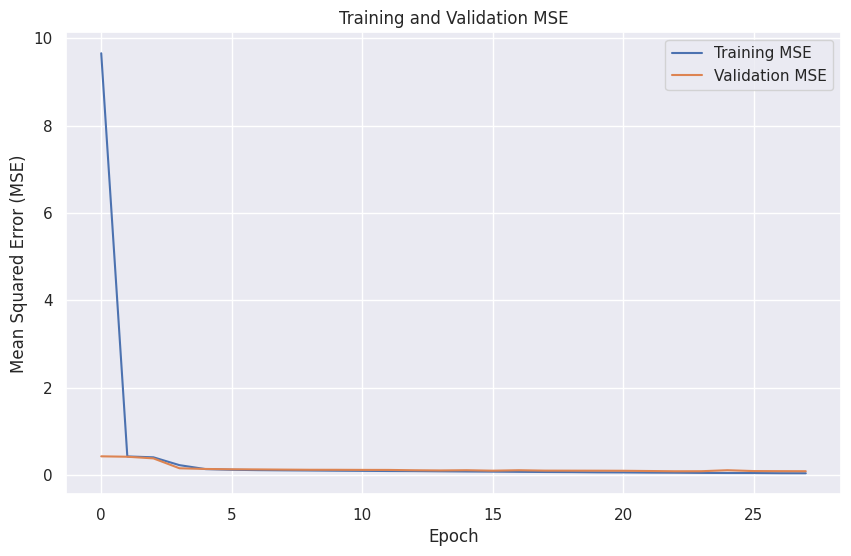

In [54]:
# We plot the chart.
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

In [55]:
# Calculate the residuals.
residuals = y_test - y_pred.flatten()

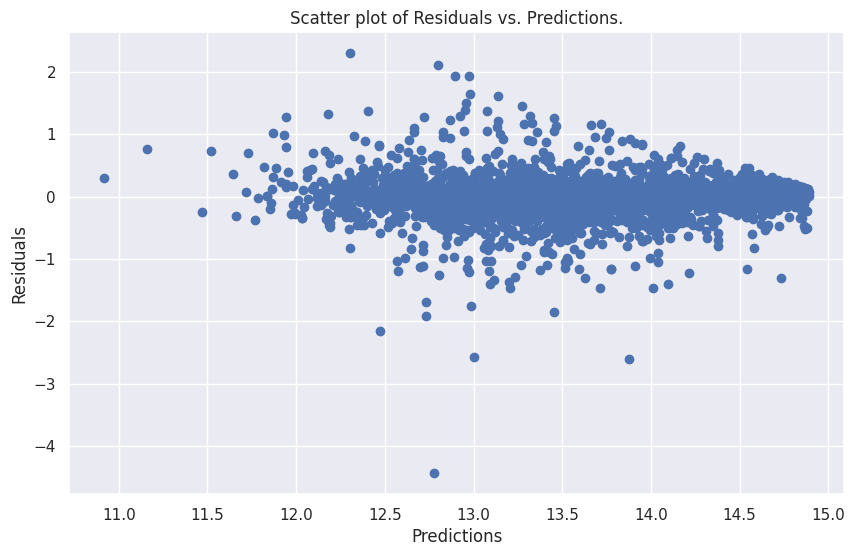

In [56]:
# Residuals vs. Predictions scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Scatter plot of Residuals vs. Predictions.")
plt.show()

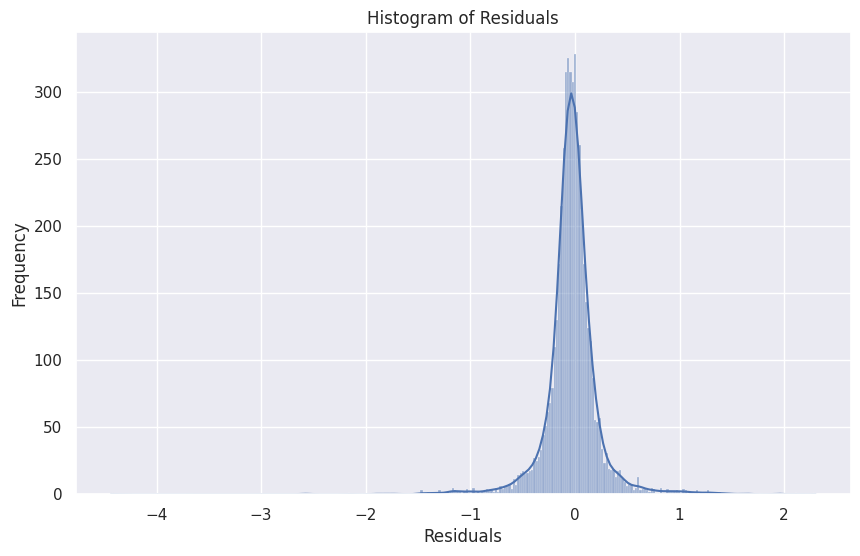

In [57]:
# Histogram of residuals.
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [58]:
# Descriptive statistics of the residuals.
mean_residuals = np.mean(residuals)
std_residuals= np.std(residuals)
quantiles_residuals = np.percentile(residuals, [25, 50, 75])

print(f"Mean of the residuals: {mean_residuals}")
print(f"Standard deviation of the residuals: {std_residuals}")
print(f"Residual quantiles (25%, 50%, 75%): {quantiles_residuals}")

Mean of the residuals: -0.030257707257399614
Standard deviation of the residuals: 0.27333975336486205
Residual quantiles (25%, 50%, 75%): [-0.12035285 -0.02991543  0.06479208]


# **Model Results Comparision**

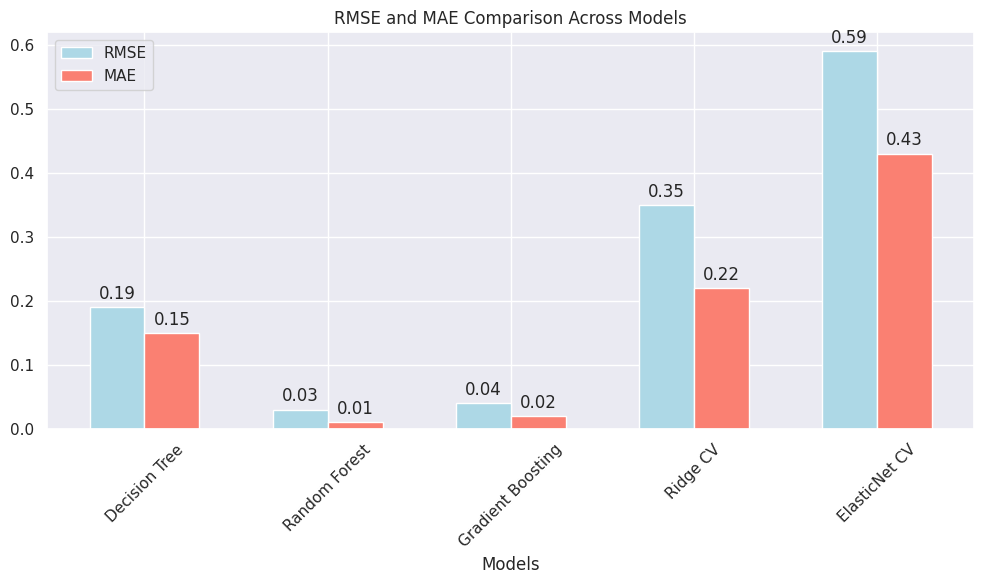

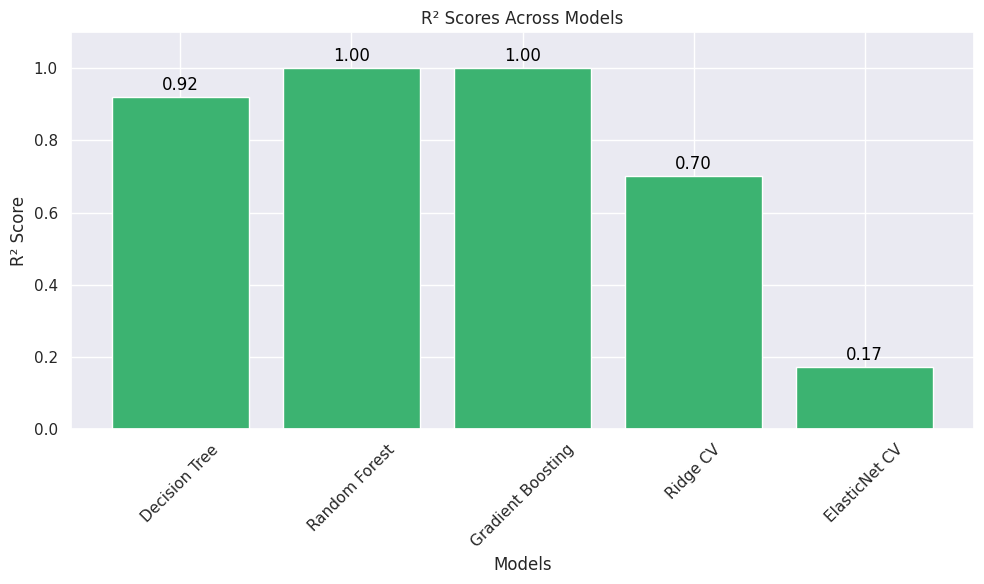

In [69]:
# Model Results

import matplotlib.pyplot as plt
import numpy as np

# Model metrics from your project
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ridge CV', 'ElasticNet CV']
rmse = [0.19, 0.03, 0.04, 0.35, 0.59]
mae = [0.15, 0.01, 0.02, 0.22, 0.43]
r2 = [0.92, 1.00, 1.00, 0.70, 0.17]

# Plotting RMSE and MAE
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, rmse, width, label='RMSE', color='lightblue')
rects2 = ax.bar(x + width/2, mae, width, label='MAE', color='salmon')

ax.set_xlabel('Models')
ax.set_title('RMSE and MAE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.tight_layout()
plt.show()

# Plotting R² separately for clarity
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(models, r2, color='mediumseagreen')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('R² Scores Across Models')
ax.set_ylim(0, 1.1)

for i, v in enumerate(r2):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Clustering Techniques**

### **K-Means Clustering**

In [ ]:
# Initial Model Development

# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select geolocation data for clustering
location_data = df[['latitude', 'longitude']]

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(location_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on elbow plot, choose optimal number of clusters, e.g., 4
optimal_clusters = 4

# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(location_data)

print("K-Means Clustering")
# Visualization of clusters
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='kmeans_cluster', data=df, palette='viridis', legend='full')
plt.title('Geographical KMeans Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


## DBSCAN

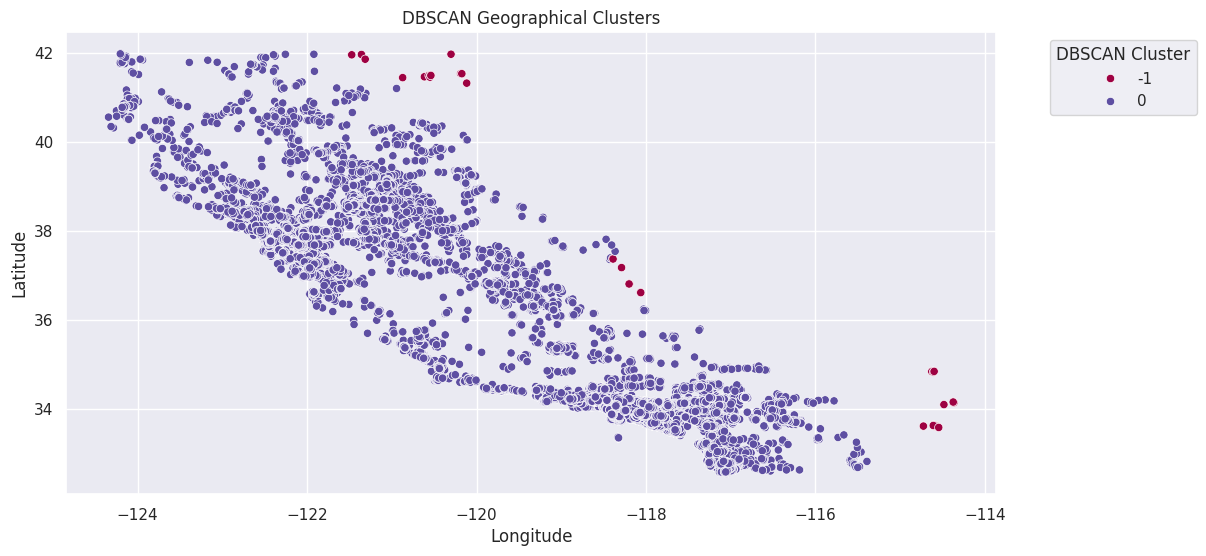

In [65]:
# Initial Model Development

#Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize location data for DBSCAN
scaler = StandardScaler()
location_scaled = scaler.fit_transform(location_data)

# DBSCAN parameters: epsilon (distance) and min_samples (minimum points to form a cluster)
dbscan = DBSCAN(eps=0.3, min_samples=50)
df['dbscan_cluster'] = dbscan.fit_predict(location_scaled)

# DBSCAN cluster visualization
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=df, palette='Spectral', legend='full')
plt.title('DBSCAN Geographical Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [66]:
# Colour coding for Price variations Geographically

# 1. Price Segmentation (Quantile-based)
# categorize prices into meaningful segments (high, moderate, low):

import pandas as pd
import numpy as np

# Create price categories based on quantiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Moderate', 'High'])

# Verify categories
print(df[['price', 'price_category']].head())


                   price price_category
id                                     
94564-18496265  675000.0       Moderate
94564-18484475  649000.0       Moderate
94564-18494835  599000.0       Moderate
94564-18484390  575000.0            Low
94564-50919342  888000.0       Moderate


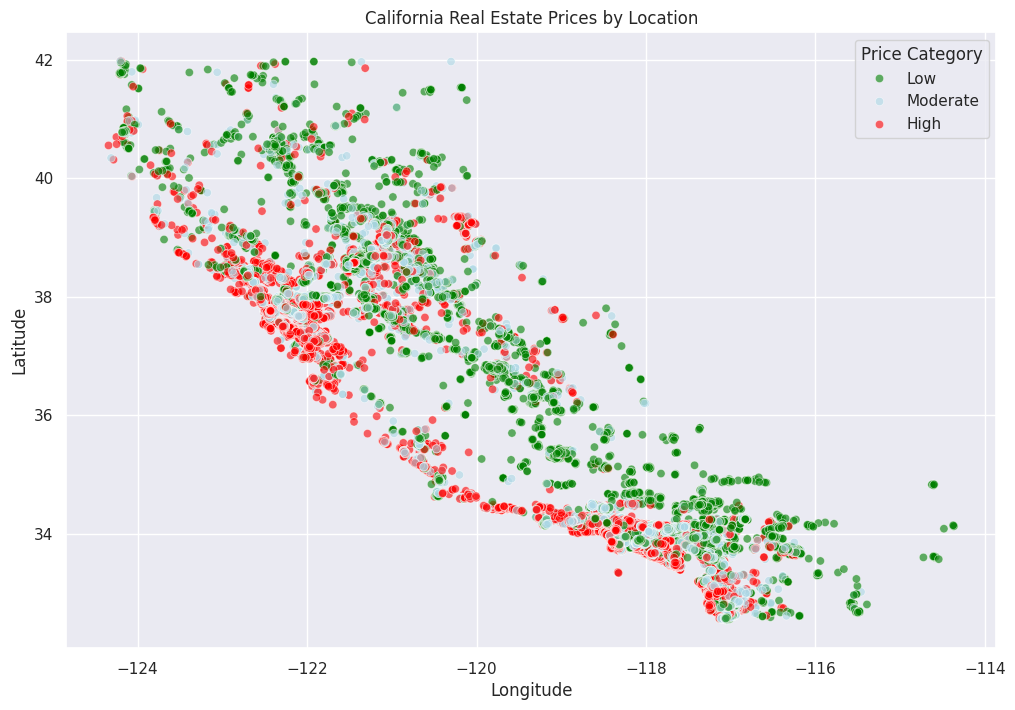

In [67]:
# Color-coded Geographic Scatter Plot (Using Matplotlib & Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette: Green (Low), Light Blue (Moderate), Red (High)
palette = {'Low':'green', 'Moderate':'lightblue', 'High':'red'}

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price_category',
                data=df, palette=palette, alpha=0.6)

plt.title('California Real Estate Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Category')
plt.show()


In [68]:
# Enhanced Interactive Map (Using Folium), for a more interactive visualization:


import folium
from folium.plugins import MarkerCluster

# Define color mapping function
def price_color(category):
    if category == 'High':
        return 'red'
    elif category == 'Moderate':
        return 'lightblue'
    else:
        return 'green'

# Initialize map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Adding markers
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=price_color(row['price_category']),
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Save map as HTML
m.save('price_geographical_clusters.html')




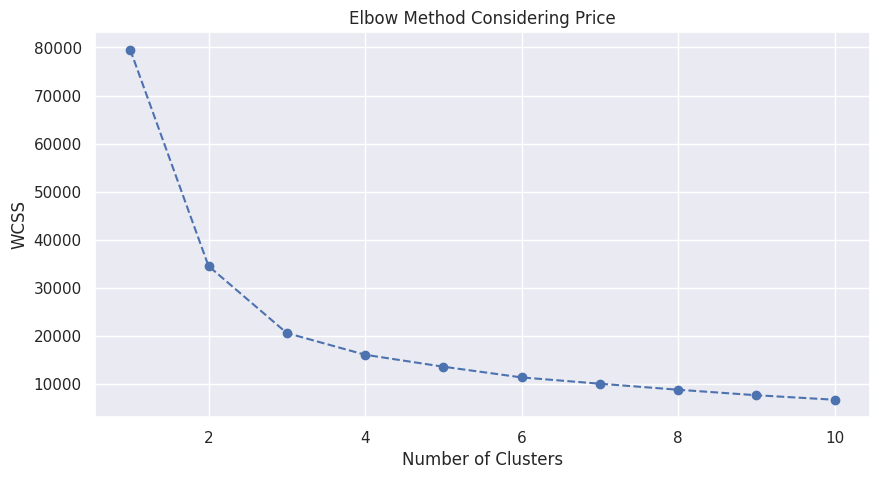

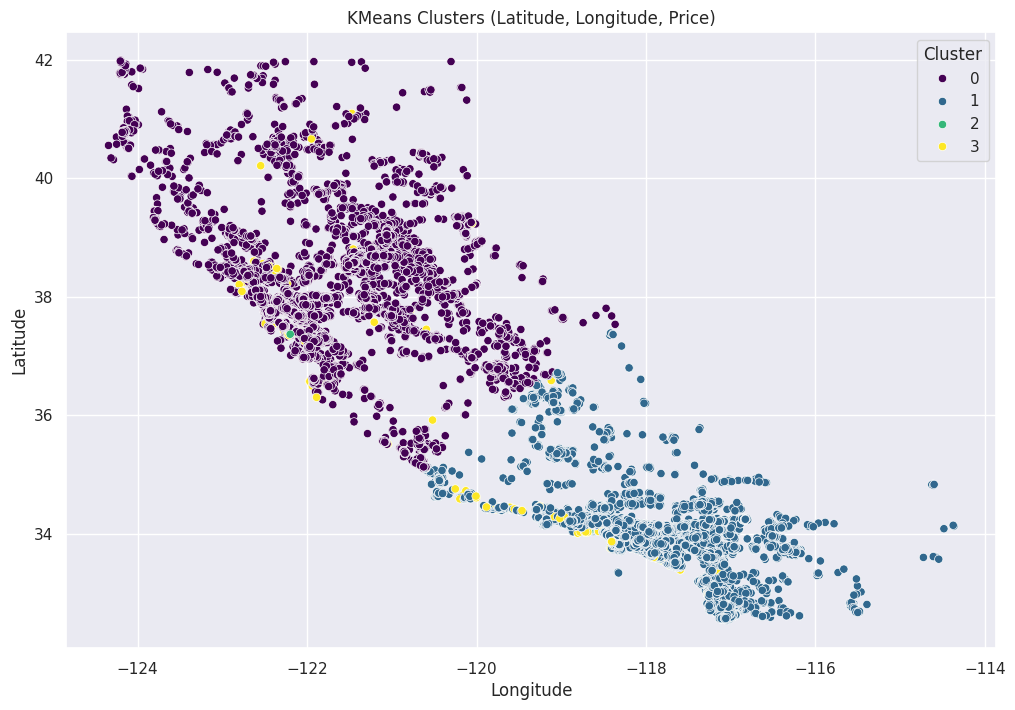

In [72]:
# Optimal clustering using coordinates and prices for meaningful insights

# Final Clustering Model development

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select relevant data columns explicitly
cluster_data = df[['latitude', 'longitude', 'price']]

# Scaling features (critical for proper distance calculations in clustering)
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_data)

# ----------- Improved KMeans Clustering -----------

# Elbow method for optimal number of clusters considering price
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_cluster_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method clearly
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method Considering Price')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

print()

# After evaluating the elbow plot visually, choose optimal clusters (example: 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_cluster_data)

# Visualization of KMeans clusters (coordinates with price segmentation)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='kmeans_cluster', data=df, palette='viridis')
plt.title('KMeans Clusters (Latitude, Longitude, Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()



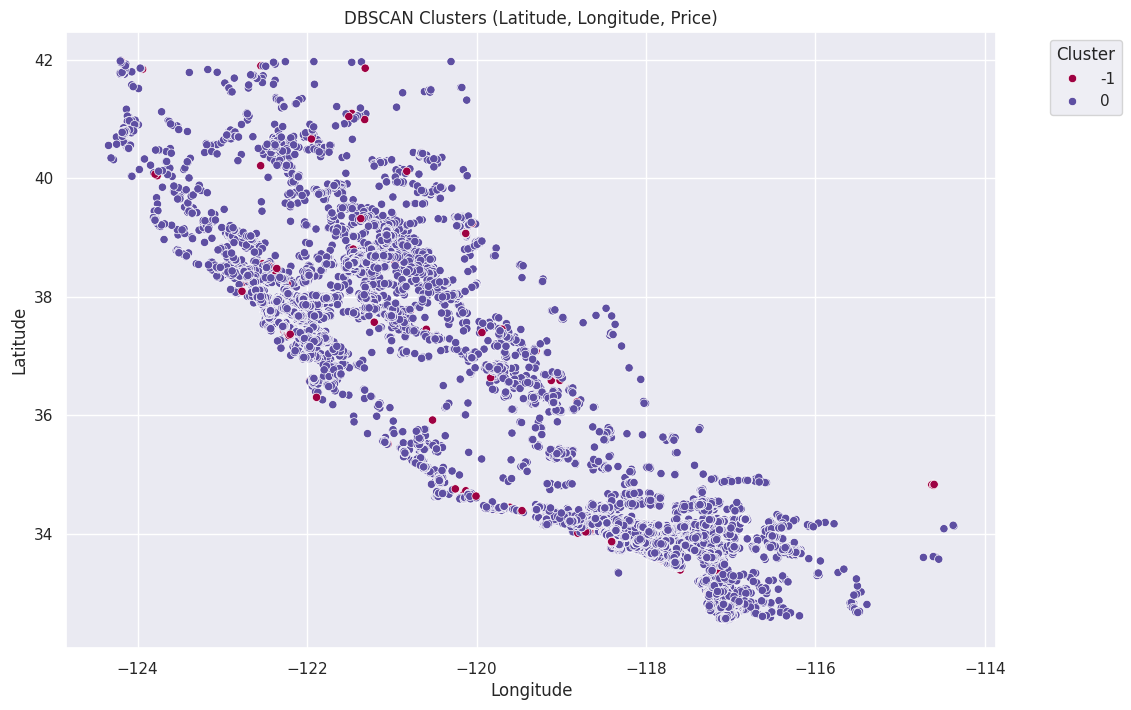

In [73]:
# ----------- Improved DBSCAN Clustering -----------

# DBSCAN clustering parameters tuned for price and coordinates
dbscan = DBSCAN(eps=0.5, min_samples=25)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_cluster_data)

# Visualization of DBSCAN clusters clearly considering price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=df, palette='Spectral', legend='full')
plt.title('DBSCAN Clusters (Latitude, Longitude, Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
